In [43]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt
#!pip unfreeze requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('display.max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %code_wrap  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%code_wrap  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  

1.26.0
1.3.0


In [44]:
# Standard Imports
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

# Read the data from the tsa_claims2.csv file, not the tsa_claims1.csv file.

In [45]:
df = pd.read_csv(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\tsa_claims2\tsa_claims2.csv", low_memory=False)

In [46]:
df.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
1,0202417M,2-Feb-02,1/16/2004 0:00,SEA,Seattle-Tacoma International,NaN,Property Damage,Checked Baggage,Luggage (all types including footlockers),$100.00,Settled,$50.00,Settle
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full


# Clean the data more thoroughly:

# Drop all rows that contain NA values.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204267 entries, 0 to 204266
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Claim Number   204267 non-null  object
 1   Date Received  204004 non-null  object
 2   Incident Date  202084 non-null  object
 3   Airport Code   195743 non-null  object
 4   Airport Name   195743 non-null  object
 5   Airline Name   169893 non-null  object
 6   Claim Type     196354 non-null  object
 7   Claim Site     203527 non-null  object
 8   Item           200301 non-null  object
 9   Claim Amount   200224 non-null  object
 10  Status         204262 non-null  object
 11  Close Amount   135315 non-null  object
 12  Disposition    131359 non-null  object
dtypes: object(13)
memory usage: 20.3+ MB


In [48]:
df_clean = df.dropna()

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94848 entries, 0 to 145143
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   94848 non-null  object
 1   Date Received  94848 non-null  object
 2   Incident Date  94848 non-null  object
 3   Airport Code   94848 non-null  object
 4   Airport Name   94848 non-null  object
 5   Airline Name   94848 non-null  object
 6   Claim Type     94848 non-null  object
 7   Claim Site     94848 non-null  object
 8   Item           94848 non-null  object
 9   Claim Amount   94848 non-null  object
 10  Status         94848 non-null  object
 11  Close Amount   94848 non-null  object
 12  Disposition    94848 non-null  object
dtypes: object(13)
memory usage: 10.1+ MB


# Store the numeric columns with the float type.

In [50]:
df_clean.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,$350.00,Approved,$350.00,Approve in Full
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,$278.88,Settled,$227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),$50.00,Approved,$50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,$84.79,Approved,$84.79,Approve in Full
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,$459.01,Settled,$227.00,Settle


In [51]:
# First, create a copy of the subset to avoid SettingWithCopyWarning
df_clean = df_clean.copy()

# Now use .loc to avoid the SettingWithCopyWarning when modifying the DataFrame
df_clean.loc[:, 'Claim Amount'] = (
    df_clean['Claim Amount']
    .replace('[^\d.]', '', regex=True)
    .astype(float, errors='ignore')
)

df_clean.loc[:, 'Close Amount'] = (
    df_clean['Close Amount']
    .replace('[^\d.]', '', regex=True)
    .astype(float, errors='ignore')
)

# Check for any values that couldn't be converted and turned into NaN
nan_in_claim = df_clean['Claim Amount'].isna().sum()
nan_in_close = df_clean['Close Amount'].isna().sum()

print(f"Number of NaNs in 'Claim Amount': {nan_in_claim}")
print(f"Number of NaNs in 'Close Amount': {nan_in_close}")

Number of NaNs in 'Claim Amount': 0
Number of NaNs in 'Close Amount': 0


In [52]:
df_clean.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.0,Approved,350.0,Approve in Full
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.0,Approved,50.0,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.0,Settle


In [53]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94848 entries, 0 to 145143
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Claim Number   94848 non-null  object
 1   Date Received  94848 non-null  object
 2   Incident Date  94848 non-null  object
 3   Airport Code   94848 non-null  object
 4   Airport Name   94848 non-null  object
 5   Airline Name   94848 non-null  object
 6   Claim Type     94848 non-null  object
 7   Claim Site     94848 non-null  object
 8   Item           94848 non-null  object
 9   Claim Amount   94848 non-null  object
 10  Status         94848 non-null  object
 11  Close Amount   94848 non-null  object
 12  Disposition    94848 non-null  object
dtypes: object(13)
memory usage: 10.1+ MB


In [54]:
df_clean['Claim Amount'] = df_clean['Claim Amount'].astype(float)
df_clean['Close Amount'] = df_clean['Close Amount'].astype(float)

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94848 entries, 0 to 145143
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Claim Number   94848 non-null  object 
 1   Date Received  94848 non-null  object 
 2   Incident Date  94848 non-null  object 
 3   Airport Code   94848 non-null  object 
 4   Airport Name   94848 non-null  object 
 5   Airline Name   94848 non-null  object 
 6   Claim Type     94848 non-null  object 
 7   Claim Site     94848 non-null  object 
 8   Item           94848 non-null  object 
 9   Claim Amount   94848 non-null  float64
 10  Status         94848 non-null  object 
 11  Close Amount   94848 non-null  float64
 12  Disposition    94848 non-null  object 
dtypes: float64(2), object(11)
memory usage: 10.1+ MB


# Store the date columns with the datetime type.

In [56]:
df_clean.head()

,Claim Number,Date Received,Incident Date,Airport Code,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition
0,0909802M,4-Jan-02,12/12/2002 0:00,EWR,Newark International Airport,Continental Airlines,Property Damage,Checkpoint,Other,350.00,Approved,350.00,Approve in Full
2,0202445M,4-Feb-02,11/26/2003 0:00,STL,Lambert St. Louis International,American Airlines,Property Damage,Checked Baggage,Cell Phones,278.88,Settled,227.92,Settle
3,0909816M,7-Feb-02,1/6/2003 0:00,MIA,Miami International Airport,American Airlines,Property Damage,Checkpoint,Luggage (all types including footlockers),50.00,Approved,50.00,Approve in Full
4,2005032379513,18-Feb-02,2/5/2005 0:00,MCO,Orlando International Airport,Delta (Song),Property Damage,Checkpoint,Baby - Strollers; car seats; playpen; etc.,84.79,Approved,84.79,Approve in Full
5,2005032479636,18-Feb-02,2/17/2005 0:00,CAK,Akron-Canton Regional,Air Tran Airlines(do not use),Passenger Property Loss,Checked Baggage,Other,459.01,Settled,227.00,Settle


In [57]:
df_clean['Date Received'] = pd.to_datetime(df['Date Received'], format='%d-%b-%y')

In [58]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94848 entries, 0 to 145143
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   94848 non-null  object        
 1   Date Received  94848 non-null  datetime64[ns]
 2   Incident Date  94848 non-null  object        
 3   Airport Code   94848 non-null  object        
 4   Airport Name   94848 non-null  object        
 5   Airline Name   94848 non-null  object        
 6   Claim Type     94848 non-null  object        
 7   Claim Site     94848 non-null  object        
 8   Item           94848 non-null  object        
 9   Claim Amount   94848 non-null  float64       
 10  Status         94848 non-null  object        
 11  Close Amount   94848 non-null  float64       
 12  Disposition    94848 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 10.1+ MB


In [59]:
df_clean['Date Received'].head(15)

0    2002-01-04
2    2002-02-04
3    2002-02-07
4    2002-02-18
5    2002-02-18
6    2002-04-30
10   2002-07-06
11   2002-07-07
21   2002-07-24
25   2002-08-19
26   2002-08-21
30   2002-09-09
45   2002-09-18
47   2002-09-19
50   2002-09-19
Name: Date Received, dtype: datetime64[ns]

# If a claim is approved or settled, what percent of the claim amount do the airports pay?

In [60]:
# Filter the data for approved or settled claims
df_clean = df_clean[df_clean['Status'].isin(['Approved', 'Settled'])]

# Calculate the total claimed and total paid for approved or settled claims
total_claimed = df_clean['Claim Amount'].sum()
total_paid = df_clean['Close Amount'].sum()

# Calculate the percentage paid
percentage_paid = (total_paid / total_claimed) * 100

percentage_paid

57.183361584014925

# What are the five airports with the most claims?

In [61]:
top_airports = df_clean['Airport Name'].value_counts().head(5)

In [62]:
print(top_airports)

Airport Name
Los Angeles International Airport       1816
Newark International Airport            1657
Chicago O'Hare International Airport    1588
Seattle-Tacoma International            1369
Phoenix Sky Harbor International        1235
Name: count, dtype: int64


# Has the total close amount increased or decreased over time?

<Axes: title={'center': 'Total Close Amount Over Time'}, xlabel='Date Received'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Total Close Amount')

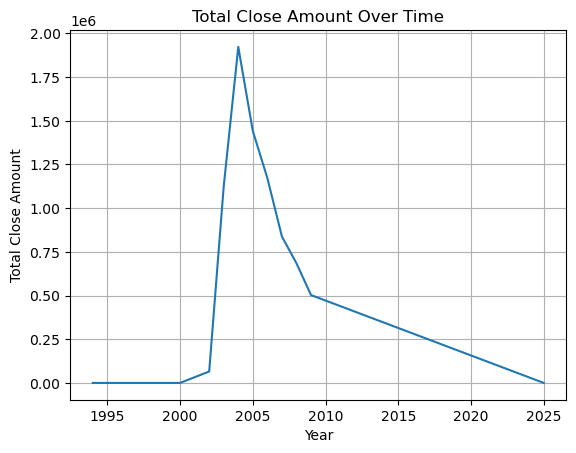

In [63]:
# For grouping by month and year, you can use df['Date Received'].dt.to_period('M')
grouped_data = df_clean.groupby(df_clean['Date Received'].dt.year)['Close Amount'].sum()

# Plotting
grouped_data.plot(kind='line', title='Total Close Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Total Close Amount')
plt.grid(True)
plt.show()

According to the data, during the *early 2000s* there was a sharp increase in the *total close amount*. Since then, it has been on a *downtrend*. In conclusion, the *close amount has been decreasing* over time.


# Create a map that shows the location of each airport in the continental U.S. and changes the size of the airport’s dot depending on its number of claims. 

In [64]:
df_map = pd.read_csv("https://raw.githubusercontent.com/fenago/datasets/main/GlobalAirportDatabase.csv")

In [65]:
df_map.head()

,ICAOCode,IATACode,AirportName,City,Country,LatitudeDegrees,LatitudeMinutes,LatitudeSeconds,LatitudeDir,LongitudeDegrees,LongitudeMinutes,LongitudeSeconds,LongitudeDirection,Altitude,LatitudeDecimalDegrees,LongitudeDecimalDegrees
0,AYGA,GKA,GOROKA,GOROKA,PAPUA NEW GUINEA,6,4,54,S,145,23,30,E,1610,-6.082,145.392
1,AYLA,LAE,NaN,LAE,PAPUA NEW GUINEA,0,0,0,U,0,0,0,U,0,0.000,0.000
2,AYMD,MAG,MADANG,MADANG,PAPUA NEW GUINEA,5,12,25,S,145,47,19,E,7,-5.207,145.789
3,AYMH,HGU,MOUNT HAGEN,MOUNT HAGEN,PAPUA NEW GUINEA,5,49,34,S,144,17,46,E,1643,-5.826,144.296
4,AYNZ,LAE,NADZAB,NADZAB,PAPUA NEW GUINEA,6,34,11,S,146,43,34,E,73,-6.570,146.726


In [67]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ICAOCode                 9300 non-null   object 
 1   IATACode                 3562 non-null   object 
 2   AirportName              4195 non-null   object 
 3   City                     9300 non-null   object 
 4   Country                  9300 non-null   object 
 5   LatitudeDegrees          9300 non-null   int64  
 6   LatitudeMinutes          9300 non-null   int64  
 7   LatitudeSeconds          9300 non-null   int64  
 8   LatitudeDir              9300 non-null   object 
 9   LongitudeDegrees         9300 non-null   int64  
 10  LongitudeMinutes         9300 non-null   int64  
 11  LongitudeSeconds         9300 non-null   int64  
 12  LongitudeDirection       9300 non-null   object 
 13  Altitude                 9300 non-null   int64  
 14  LatitudeDecimalDegrees  

In [68]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41568 entries, 0 to 145143
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Claim Number   41568 non-null  object        
 1   Date Received  41568 non-null  datetime64[ns]
 2   Incident Date  41568 non-null  object        
 3   Airport Code   41568 non-null  object        
 4   Airport Name   41568 non-null  object        
 5   Airline Name   41568 non-null  object        
 6   Claim Type     41568 non-null  object        
 7   Claim Site     41568 non-null  object        
 8   Item           41568 non-null  object        
 9   Claim Amount   41568 non-null  float64       
 10  Status         41568 non-null  object        
 11  Close Amount   41568 non-null  float64       
 12  Disposition    41568 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 4.4+ MB


In [69]:
# Convert the airport names in both DataFrames to uppercase to ensure matching is consistent
df_map['AirportName'] = df_map['AirportName'].str.upper()
df_clean['Airport Name'] = df_clean['Airport Name'].str.upper()

# Merge the dataframes on the 'Airport Name' column
df_combined = pd.merge(df_clean, df_map[['AirportName', 'LatitudeDecimalDegrees', 'LongitudeDecimalDegrees']],
                       left_on='Airport Name', right_on='AirportName', how='left')

In [70]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41570 entries, 0 to 41569
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Claim Number             41570 non-null  object        
 1   Date Received            41570 non-null  datetime64[ns]
 2   Incident Date            41570 non-null  object        
 3   Airport Code             41570 non-null  object        
 4   Airport Name             41570 non-null  object        
 5   Airline Name             41570 non-null  object        
 6   Claim Type               41570 non-null  object        
 7   Claim Site               41570 non-null  object        
 8   Item                     41570 non-null  object        
 9   Claim Amount             41570 non-null  float64       
 10  Status                   41570 non-null  object        
 11  Close Amount             41570 non-null  float64       
 12  Disposition              41570 n

     ---------------------------------------- 0.0/51.1 kB ? eta -:--:--
     -------- ------------------------------- 10.2/51.1 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.1 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 51.1/51.1 kB 434.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 2.0 MB/s eta 0:00:01
   ------ --------------------------------- 0.2/1.1 MB 2.1 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.1 MB 2.2 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.1 MB 2.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.3/1.1 MB 1.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.4/1.1 MB 1.6 MB/s eta 0:00:01
   -------------- ------------------------- 0.4/1.1 MB 1.6 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.1 MB 1.5 MB/s eta 0:00:01
   ---------------


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


(-181.00369999999998, 161.2877, 12.3652, 72.94879999999999)

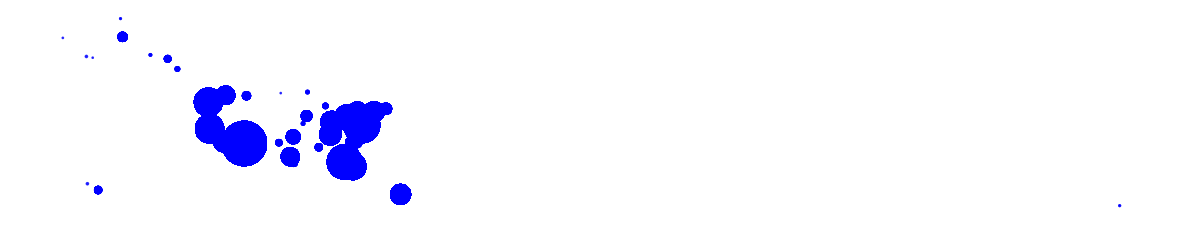

In [73]:
!pip install geopandas

import geopandas as gpd
from shapely.geometry import Point

# Assuming df is your DataFrame and it contains 'LatitudeDecimalDegrees', 'LongitudeDecimalDegrees', and 'AirportName'

# First, let's remove any potential rows where latitude or longitude could be NaN
df_combined = df_combined.dropna(subset=['LatitudeDecimalDegrees', 'LongitudeDecimalDegrees'])

# Count the number of claims per airport
claims_count = df_combined.groupby('AirportName').size().reset_index(name='ClaimsCount')

# Merge this count back to the original dataframe to associate each airport with its number of claims
df_combined = df_combined.merge(claims_count, on='AirportName')

# Now let's create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_combined, geometry=gpd.points_from_xy(df_combined.LongitudeDecimalDegrees, df_combined.LatitudeDecimalDegrees))

# We will normalize the size of the claims count to use it as a size for the dots
gdf['ClaimsCountSize'] = (gdf['ClaimsCount'] - gdf['ClaimsCount'].min()) / (gdf['ClaimsCount'].max() - gdf['ClaimsCount'].min())

# Plotting the map
# For the continental US, we might want to set the boundaries to exclude locations outside this area
ax = gdf.plot(
    marker='o',
    color='blue',
    markersize=gdf['ClaimsCountSize'] * 1000,  # Adjust the multiplier as needed for better visualization
    alpha=0.5,
    figsize=(15, 10)
)

# Remove the axis for a clean look
ax.axis('off')

# Show the plot
plt.show()


In [78]:
states = gpd.read_file(r"C:\Users\jsell\OneDrive\Documents\SCHOOL\Alberto Stuff\MDC\MDC Semester's\Spring 2024\Data Wrangling\Datasets\fenago datasets e0b1b12f0864fcf9c73aa6fb80fb38d9da5c6c69 maps\states.shp")

In [79]:
states.head()

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<Axes: >

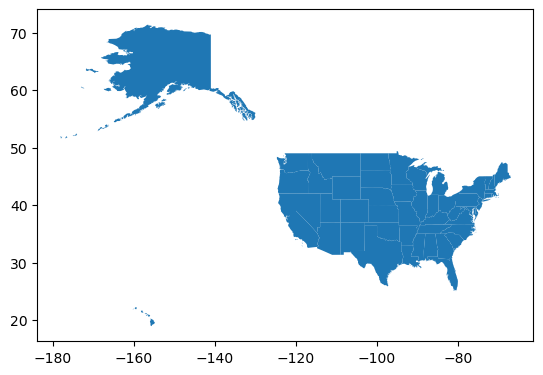

In [80]:
states.plot()